# Cluster Algorithms

Comparing cluster algorithms with spotify music data.

### Project Outline

1. Data Exploration
2. Data Preprocessing
3. Clustering Algorithms
3.1 K-Means
3.2 DBSCAN
3.3 Agglomerative Clustering
3.4 Gaussian Mixture Model
3.5 Spectral Clustering
3.6 Affinity Propagation
3.7 Birch
3.8 Mean Shift
3.9 OPTICS
3.10 HDBSCAN

4. Evaluation
5. Conclusion

In [1]:
# Importing libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# IPython magic
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator


## 1. Data Exploration

In [2]:
df = pd.read_csv('tracklist.csv')
df.head()

,added_at,id,name,popularity,uri,artist,album,release_date,duration_ms,length,...,liveness,loudness,speechiness,tempo,time_signature,valence,mode,key,genres,genre_group
0,2023-04-05T14:24:20Z,1juU855MrNRey6Dh6sEbWh,Techno On My Mind,42,spotify:track:1juU855MrNRey6Dh6sEbWh,elMefti,Techno On My Mind,2022-06-10,317260,317260.0,...,0.0900,-8.161,0.0614,146.006,4.0,0.6530,1.0,8.0,NaN,NaN
1,2023-04-04T16:28:17Z,752l1xT5G1OHzg71ZBnTyZ,Superman,52,spotify:track:752l1xT5G1OHzg71ZBnTyZ,Black Coffee,Home Brewed,2009-11-13,433626,433626.0,...,0.1200,-9.539,0.0706,123.979,4.0,0.7300,0.0,5.0,"afro house, deep house, south african house, s...",house
2,2023-04-03T17:14:26Z,1KDBSFUqriIaMOg7igDUJ6,Lowdown - Classic Vocal,3,spotify:track:1KDBSFUqriIaMOg7igDUJ6,Soul Vision,Lowdown,2018-05-18,401273,401273.0,...,0.0423,-9.748,0.1230,124.979,4.0,0.7340,0.0,11.0,NaN,NaN
3,2023-03-30T19:58:33Z,3lAbyDO7nk7vrXvQ1XNap8,Capture Casa,42,spotify:track:3lAbyDO7nk7vrXvQ1XNap8,HVOB,TOO,2022-04-08,400263,400263.0,...,0.1390,-10.513,0.0748,127.014,4.0,0.0379,0.0,3.0,electronica,electronic
4,2023-03-29T13:50:40Z,3xsNTAAseZTnt9qeYBZVvA,GOOD TIMES - Elephant Talk Remix,39,spotify:track:3xsNTAAseZTnt9qeYBZVvA,Jungle,GOOD TIMES (Elephant Talk Remix),2022-11-18,295813,295813.0,...,0.2870,-6.255,0.0472,132.998,4.0,0.6120,0.0,11.0,"indie soul, uk contemporary r&b",indie


## 2. Data Preprocessing

In [3]:
# Preprocessing for k-means
# Select columns to be used
df_cl = df[['tempo', 'loudness', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
        'liveness', 'valence']]

# Fill zeros values with 0.1
df_cl = df_cl.replace(0, 0.1)

# Replace NaN values with mean
df_cl = df_cl.fillna(df_cl.mean())

In [4]:
# Log transformation
df_log = np.log(df_cl)
print(df_log.head(3))

      tempo  loudness  danceability    energy       key      mode   
0  4.983648       NaN     -0.316082 -0.002002  2.079442  0.000000  \
1  4.820112       NaN     -0.186330 -0.373966  1.609438 -2.302585   
2  4.828146       NaN     -0.080126 -0.572701  2.397895 -2.302585   

   speechiness  acousticness  instrumentalness  liveness   valence  
0    -2.790345     -5.867479         -1.210662 -2.407946 -0.426178  
1    -2.650725     -2.779009         -0.345311 -2.120264 -0.314711  
2    -2.095571     -5.286389         -1.807889 -3.162968 -0.309246  


/Users/erictak/miniconda3/envs/airflow/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [5]:
# Standardization
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_cl)

print(df_scaled[:3])

[[ 1.11536377  0.06649875  0.09308744  1.59394349  0.67598454  1.02572903
  -0.34945604 -0.64229032 -0.08398297 -0.47193583  0.28321347]
 [ 0.04034688 -0.38297998  0.90368141 -0.10164404 -0.14172434 -0.97633132
  -0.23843772 -0.37147616  1.06461882 -0.26370351  0.59480546]
 [ 0.08915139 -0.45115201  1.65006992 -0.77987905  1.49369341 -0.97633132
   0.39388404 -0.63210109 -0.45937965 -0.80302522  0.61099206]]


In [6]:
# Min Max Scaling
scaler = MinMaxScaler()
df_scaled_positive = scaler.fit_transform(df_log)

print(df_scaled_positive[:3])

[[0.73182251        nan 0.80216941 0.99962621 0.93225081 1.
  0.29086401 0.53279881 0.91323434 0.44413346 0.89725392]
 [0.60623505        nan 0.89171646 0.93017734 0.83226026 0.
  0.33526342 0.77888797 0.97592989 0.51148251 0.92484333]
 [0.61240441        nan 0.9650118  0.89307193 1.         0.
  0.5118031  0.57910003 0.86996462 0.26737564 0.92619585]]


/Users/erictak/miniconda3/envs/airflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/erictak/miniconda3/envs/airflow/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [7]:
# Elbow method
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)

/Users/erictak/miniconda3/envs/airflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/erictak/miniconda3/envs/airflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/erictak/miniconda3/envs/airflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/erictak/miniconda3/envs/airflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

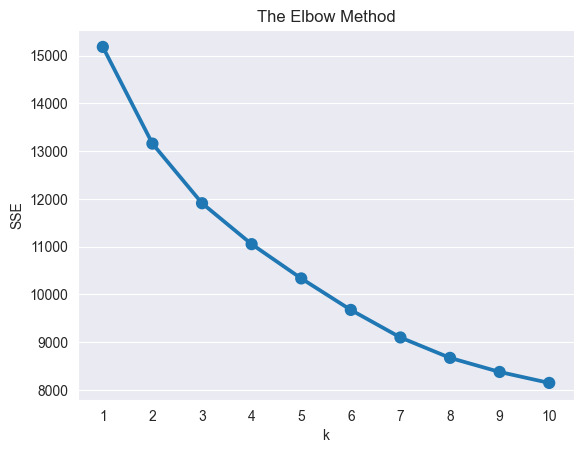

In [8]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.show()

In [9]:
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 4


## 3. Clustering Algorithms

### 3.1 K-Means

In [10]:
model = KMeans(n_clusters=10, random_state=42)
model.fit(df_scaled)
df = df.assign(ClusterLabel= model.labels_)

/Users/erictak/miniconda3/envs/airflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
# Rename CLusterLabel to KMeans
df = df.rename(columns={'ClusterLabel': 'KMeans'})
df.groupby("KMeans")[["valence", "acousticness" ]].median()

,valence,acousticness
KMeans,,
0,0.3610,0.18600
1,0.5090,0.00561
2,0.3950,0.77450
3,0.7180,0.03320
4,0.5840,0.22100
5,0.6800,0.02630
6,0.6735,0.02635
7,0.5520,0.00596
8,0.5010,0.08580


In [12]:
# Cluster Label to categorical
df['KMeans'] = df['KMeans'].astype('category')

In [ ]:
fig = px.scatter(
    data_frame=df,
    x = "valence",
    y= "acousticness",
    title = "Spotify Music Data",
    color = "KMeans",
    height=500
)
fig.show()

In [14]:
# Scatter matrix without upper half
fig = go.Figure(
    data=go.Splom(
        dimensions=[dict(label='valence', values=df['valence']),
                    dict(label='acousticness', values=df['acousticness']),
                    dict(label='danceability', values=df['danceability']),
                    dict(label='energy', values=df['energy']),
                    dict(label='instrumentalness', values=df['instrumentalness']),
                    dict(label='liveness', values=df['liveness']),
                    dict(label='speechiness', values=df['speechiness']),
                    dict(label='tempo', values=df['tempo'])],
        text=df['KMeans'],
        showupperhalf=False,
        diagonal=dict(visible=False),
        marker=dict(
            color=df['KMeans'],
            showscale=True,
            colorscale='Viridis',
            line_color='white',
            line_width=0.5,
            size=5,
            opacity=0.6
        )
    )
)

fig.update_layout(
    title='Spotify Music Data',
    showlegend=True,
    width=1000,
    height=1000,
    dragmode='select',
    hovermode='closest',

)

fig.show()

In [15]:
# Bar plot for count of each cluster
fig = px.histogram(
    data_frame=df,
    x = "KMeans",
    title = "Spotify Music Data",
    color = "KMeans",
    height=500
)
fig.show()

### 3.2 DBSCAN

In [115]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# create DBSCAN object and set hyperparameters
dbscan = DBSCAN(eps=10, min_samples=100)

# fit the model on the data
dbscan.fit(df_scaled)

# get the cluster assignments for each data point
labels = dbscan.labels_

# add the cluster labels to the DataFrame
df['DBSCAN'] = labels

# print a summary of the clustering
print('Number of clusters: {}'.format(len(set(labels))))
print('Cluster assignments: {}'.format(labels))

Number of clusters: 1
Cluster assignments: [0 0 0 ... 0 0 0]


In [116]:
set(labels)

{0}

In [109]:
df.head(10)

,name,artist,album,KMeans,DBSCAN,GaussianMM,Spectral,Agglomerative,Affinity,Birch,MeanShift,OPTICS,HDBSCAN,FuzzyCMeans,TSNE,DPGMM,AIB,WHC
0,Techno On My Mind,elMefti,Techno On My Mind,1,-1,9,3,3,19,6,1,0,-1,3,3,9,0,3
1,Superman,Black Coffee,Home Brewed,7,-1,3,1,2,0,8,0,0,1,3,3,3,0,2
2,Lowdown - Classic Vocal,Soul Vision,Lowdown,9,-1,8,0,6,2,1,0,0,1,3,3,3,0,6
3,Capture Casa,HVOB,TOO,2,-1,3,5,0,22,3,137,0,-1,9,9,7,0,0
4,GOOD TIMES - Elephant Talk Remix,Jungle,GOOD TIMES (Elephant Talk Remix),7,-1,3,9,2,38,8,0,0,-1,3,3,3,0,2
5,Hero Dance,Grand V,Hero Dance,7,-1,3,9,2,25,8,0,0,-1,3,3,0,0,2
6,Acidule,Various Artists,Ethereal VA,1,-1,9,6,3,4,0,111,0,0,3,3,9,0,3
7,1992,No_4mat,1992,7,-1,3,1,2,21,8,0,0,1,3,3,3,0,2
8,Meet Her At The Loveparade - Nalin & Kane Remix,Da Hool,Meet Her at the Loveparade,1,-1,9,8,3,39,0,126,0,0,3,3,9,0,3
9,Phonky Tribu - DJ HEARTSTRING Remix,Funk Tribu,Phonky Tribu (DJ HEARTSTRING Remix),1,-1,9,3,3,19,0,71,0,-1,3,3,0,0,3


In [18]:
# Scatter matrix without upper half
fig = go.Figure(
    data=go.Splom(
        dimensions=[dict(label='valence', values=df['valence']),
                    dict(label='acousticness', values=df['acousticness']),
                    dict(label='danceability', values=df['danceability']),
                    dict(label='energy', values=df['energy']),
                    dict(label='instrumentalness', values=df['instrumentalness']),
                    dict(label='liveness', values=df['liveness']),
                    dict(label='speechiness', values=df['speechiness']),
                    dict(label='tempo', values=df['tempo'])],
        text=df['DBSCAN'],
        showupperhalf=False,
        diagonal=dict(visible=False),
        marker=dict(
            color=df['DBSCAN'],
            showscale=True,
            colorscale='Viridis',
            line_color='white',
            line_width=0.5,
            size=5,
            opacity=0.6
        )
    )
)

fig.update_layout(
    title='Spotify Music Data',
    showlegend=True,
    width=1000,
    height=1000,
    dragmode='select',
    hovermode='closest',

)

fig.show()

### 3.3 Agglomerative Clustering

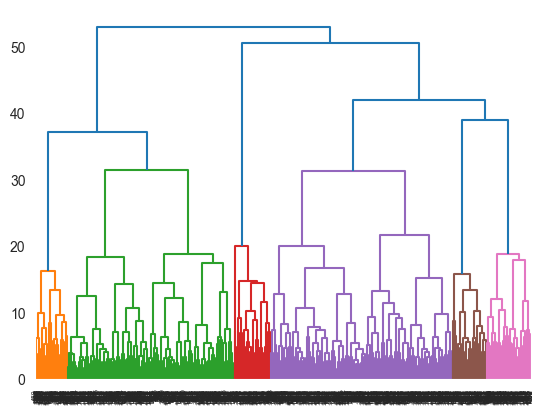

In [19]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))

In [20]:
# create Agglomerative Clustering object and set hyperparameters
agg = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')

# fit the model on the data
agg.fit(df_scaled)

# get the cluster assignments for each data point
labels = agg.labels_

# add the cluster labels to the DataFrame
df['Agglomerative'] = labels

/Users/erictak/miniconda3/envs/airflow/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [21]:
print(df.head(10))

               added_at                      id   
0  2023-04-05T14:24:20Z  1juU855MrNRey6Dh6sEbWh  \
1  2023-04-04T16:28:17Z  752l1xT5G1OHzg71ZBnTyZ   
2  2023-04-03T17:14:26Z  1KDBSFUqriIaMOg7igDUJ6   
3  2023-03-30T19:58:33Z  3lAbyDO7nk7vrXvQ1XNap8   
4  2023-03-29T13:50:40Z  3xsNTAAseZTnt9qeYBZVvA   
5  2023-03-28T19:10:32Z  1B2xkcuOPjhtCWyojUKbUk   
6  2023-03-27T07:08:33Z  4N2j73aEDUQKjlkYFkIio5   
7  2023-03-24T19:15:06Z  4N28QlYB0XW6H5gaXBHt6T   
8  2023-03-24T00:39:38Z  5atmUwQngfhOfZvgGJCrJ0   
9  2023-03-23T21:24:05Z  7w8qT1UcnJIZafNiLu2C7h   

                                              name  popularity   
0                                Techno On My Mind          42  \
1                                         Superman          52   
2                          Lowdown - Classic Vocal           3   
3                                     Capture Casa          42   
4                 GOOD TIMES - Elephant Talk Remix          39   
5                                       He

### 3.4 Gaussian Mixture Model

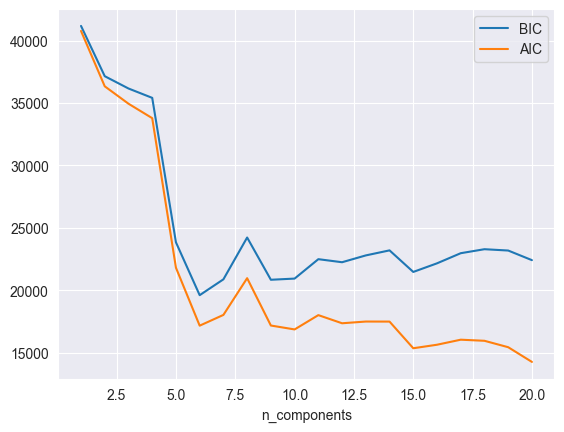

In [22]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_scaled) for n in n_components]

plt.plot(n_components, [m.bic(df_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_scaled) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [23]:
# create Gaussian Mixture Model object and set hyperparameters
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=0)

# fit the model on the data
gmm.fit(df_scaled)

# get the cluster assignments for each data point
labels = gmm.predict(df_scaled)

# add the cluster labels to the DataFrame
df['GaussianMM'] = labels

In [24]:
print(df.head(10))

               added_at                      id   
0  2023-04-05T14:24:20Z  1juU855MrNRey6Dh6sEbWh  \
1  2023-04-04T16:28:17Z  752l1xT5G1OHzg71ZBnTyZ   
2  2023-04-03T17:14:26Z  1KDBSFUqriIaMOg7igDUJ6   
3  2023-03-30T19:58:33Z  3lAbyDO7nk7vrXvQ1XNap8   
4  2023-03-29T13:50:40Z  3xsNTAAseZTnt9qeYBZVvA   
5  2023-03-28T19:10:32Z  1B2xkcuOPjhtCWyojUKbUk   
6  2023-03-27T07:08:33Z  4N2j73aEDUQKjlkYFkIio5   
7  2023-03-24T19:15:06Z  4N28QlYB0XW6H5gaXBHt6T   
8  2023-03-24T00:39:38Z  5atmUwQngfhOfZvgGJCrJ0   
9  2023-03-23T21:24:05Z  7w8qT1UcnJIZafNiLu2C7h   

                                              name  popularity   
0                                Techno On My Mind          42  \
1                                         Superman          52   
2                          Lowdown - Classic Vocal           3   
3                                     Capture Casa          42   
4                 GOOD TIMES - Elephant Talk Remix          39   
5                                       He

### 3.5 Spectral Clustering

In [25]:
from sklearn.cluster import SpectralClustering

# create Spectral Clustering object and set hyperparameters
sc = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', n_neighbors=10)

# fit the model on the data
sc.fit(df_scaled)

# get the cluster assignments for each data point
labels = sc.labels_

# add the cluster labels to the DataFrame
df['Spectral'] = labels


In [26]:
df.to_csv('spotify.csv')
print(df.head(10))

               added_at                      id   
0  2023-04-05T14:24:20Z  1juU855MrNRey6Dh6sEbWh  \
1  2023-04-04T16:28:17Z  752l1xT5G1OHzg71ZBnTyZ   
2  2023-04-03T17:14:26Z  1KDBSFUqriIaMOg7igDUJ6   
3  2023-03-30T19:58:33Z  3lAbyDO7nk7vrXvQ1XNap8   
4  2023-03-29T13:50:40Z  3xsNTAAseZTnt9qeYBZVvA   
5  2023-03-28T19:10:32Z  1B2xkcuOPjhtCWyojUKbUk   
6  2023-03-27T07:08:33Z  4N2j73aEDUQKjlkYFkIio5   
7  2023-03-24T19:15:06Z  4N28QlYB0XW6H5gaXBHt6T   
8  2023-03-24T00:39:38Z  5atmUwQngfhOfZvgGJCrJ0   
9  2023-03-23T21:24:05Z  7w8qT1UcnJIZafNiLu2C7h   

                                              name  popularity   
0                                Techno On My Mind          42  \
1                                         Superman          52   
2                          Lowdown - Classic Vocal           3   
3                                     Capture Casa          42   
4                 GOOD TIMES - Elephant Talk Remix          39   
5                                       He

### 3.6 Affinity Propagation

In [27]:
from sklearn.cluster import AffinityPropagation

# create Affinity Propagation object and set hyperparameters
af = AffinityPropagation(preference=-50)

# fit the model on the data
af.fit(df_scaled)

# get the cluster assignments for each data point
labels = af.labels_

# add the cluster labels to the DataFrame
df['Affinity'] = labels


In [28]:
print(df.head(10))

               added_at                      id   
0  2023-04-05T14:24:20Z  1juU855MrNRey6Dh6sEbWh  \
1  2023-04-04T16:28:17Z  752l1xT5G1OHzg71ZBnTyZ   
2  2023-04-03T17:14:26Z  1KDBSFUqriIaMOg7igDUJ6   
3  2023-03-30T19:58:33Z  3lAbyDO7nk7vrXvQ1XNap8   
4  2023-03-29T13:50:40Z  3xsNTAAseZTnt9qeYBZVvA   
5  2023-03-28T19:10:32Z  1B2xkcuOPjhtCWyojUKbUk   
6  2023-03-27T07:08:33Z  4N2j73aEDUQKjlkYFkIio5   
7  2023-03-24T19:15:06Z  4N28QlYB0XW6H5gaXBHt6T   
8  2023-03-24T00:39:38Z  5atmUwQngfhOfZvgGJCrJ0   
9  2023-03-23T21:24:05Z  7w8qT1UcnJIZafNiLu2C7h   

                                              name  popularity   
0                                Techno On My Mind          42  \
1                                         Superman          52   
2                          Lowdown - Classic Vocal           3   
3                                     Capture Casa          42   
4                 GOOD TIMES - Elephant Talk Remix          39   
5                                       He

### 3.7 Birch

In [29]:
from sklearn.cluster import Birch

# create Birch object and set hyperparameters
birch = Birch(n_clusters=10)

# fit the model on the data
birch.fit(df_scaled)

# get the cluster assignments for each data point
labels = birch.labels_

# add the cluster labels to the DataFrame
df['Birch'] = labels


In [30]:
print(df.head(10))

               added_at                      id   
0  2023-04-05T14:24:20Z  1juU855MrNRey6Dh6sEbWh  \
1  2023-04-04T16:28:17Z  752l1xT5G1OHzg71ZBnTyZ   
2  2023-04-03T17:14:26Z  1KDBSFUqriIaMOg7igDUJ6   
3  2023-03-30T19:58:33Z  3lAbyDO7nk7vrXvQ1XNap8   
4  2023-03-29T13:50:40Z  3xsNTAAseZTnt9qeYBZVvA   
5  2023-03-28T19:10:32Z  1B2xkcuOPjhtCWyojUKbUk   
6  2023-03-27T07:08:33Z  4N2j73aEDUQKjlkYFkIio5   
7  2023-03-24T19:15:06Z  4N28QlYB0XW6H5gaXBHt6T   
8  2023-03-24T00:39:38Z  5atmUwQngfhOfZvgGJCrJ0   
9  2023-03-23T21:24:05Z  7w8qT1UcnJIZafNiLu2C7h   

                                              name  popularity   
0                                Techno On My Mind          42  \
1                                         Superman          52   
2                          Lowdown - Classic Vocal           3   
3                                     Capture Casa          42   
4                 GOOD TIMES - Elephant Talk Remix          39   
5                                       He

### 3.8 Mean Shift

In [31]:
from sklearn.cluster import MeanShift

# create Mean Shift object and set hyperparameters
ms = MeanShift(bandwidth=2)

# fit the model on the data
ms.fit(df_scaled)

# get the cluster assignments for each data point
labels = ms.labels_

# add the cluster labels to the DataFrame
df['MeanShift'] = labels


In [32]:
print(df.head(10))

               added_at                      id   
0  2023-04-05T14:24:20Z  1juU855MrNRey6Dh6sEbWh  \
1  2023-04-04T16:28:17Z  752l1xT5G1OHzg71ZBnTyZ   
2  2023-04-03T17:14:26Z  1KDBSFUqriIaMOg7igDUJ6   
3  2023-03-30T19:58:33Z  3lAbyDO7nk7vrXvQ1XNap8   
4  2023-03-29T13:50:40Z  3xsNTAAseZTnt9qeYBZVvA   
5  2023-03-28T19:10:32Z  1B2xkcuOPjhtCWyojUKbUk   
6  2023-03-27T07:08:33Z  4N2j73aEDUQKjlkYFkIio5   
7  2023-03-24T19:15:06Z  4N28QlYB0XW6H5gaXBHt6T   
8  2023-03-24T00:39:38Z  5atmUwQngfhOfZvgGJCrJ0   
9  2023-03-23T21:24:05Z  7w8qT1UcnJIZafNiLu2C7h   

                                              name  popularity   
0                                Techno On My Mind          42  \
1                                         Superman          52   
2                          Lowdown - Classic Vocal           3   
3                                     Capture Casa          42   
4                 GOOD TIMES - Elephant Talk Remix          39   
5                                       He

### 3.9 OPTICS

In [33]:
import sklearn.cluster as cluster

# create OPTICS object and set hyperparameters
optics = cluster.OPTICS(min_samples=10, xi=.05, min_cluster_size=.05, metric='euclidean')

# fit the model on the data
optics.fit(df_scaled)

# get the cluster assignments for each data point
labels = optics.labels_

# add the cluster labels to the DataFrame
df['OPTICS'] = labels


In [34]:
print(df.head(10))

               added_at                      id   
0  2023-04-05T14:24:20Z  1juU855MrNRey6Dh6sEbWh  \
1  2023-04-04T16:28:17Z  752l1xT5G1OHzg71ZBnTyZ   
2  2023-04-03T17:14:26Z  1KDBSFUqriIaMOg7igDUJ6   
3  2023-03-30T19:58:33Z  3lAbyDO7nk7vrXvQ1XNap8   
4  2023-03-29T13:50:40Z  3xsNTAAseZTnt9qeYBZVvA   
5  2023-03-28T19:10:32Z  1B2xkcuOPjhtCWyojUKbUk   
6  2023-03-27T07:08:33Z  4N2j73aEDUQKjlkYFkIio5   
7  2023-03-24T19:15:06Z  4N28QlYB0XW6H5gaXBHt6T   
8  2023-03-24T00:39:38Z  5atmUwQngfhOfZvgGJCrJ0   
9  2023-03-23T21:24:05Z  7w8qT1UcnJIZafNiLu2C7h   

                                              name  popularity   
0                                Techno On My Mind          42  \
1                                         Superman          52   
2                          Lowdown - Classic Vocal           3   
3                                     Capture Casa          42   
4                 GOOD TIMES - Elephant Talk Remix          39   
5                                       He

### 3.10 HDBSCAN

In [35]:
import hdbscan

# create HDBSCAN object and set hyperparameters
hdbscan = hdbscan.HDBSCAN(min_cluster_size=10)

# fit the model on the data
hdbscan.fit(df_scaled)

# get the cluster assignments for each data point
labels = hdbscan.labels_

# add the cluster labels to the DataFrame
df['HDBSCAN'] = labels


In [36]:
df.to_csv('spotify.csv')
print(df.head())

               added_at                      id   
0  2023-04-05T14:24:20Z  1juU855MrNRey6Dh6sEbWh  \
1  2023-04-04T16:28:17Z  752l1xT5G1OHzg71ZBnTyZ   
2  2023-04-03T17:14:26Z  1KDBSFUqriIaMOg7igDUJ6   
3  2023-03-30T19:58:33Z  3lAbyDO7nk7vrXvQ1XNap8   
4  2023-03-29T13:50:40Z  3xsNTAAseZTnt9qeYBZVvA   

                               name  popularity   
0                 Techno On My Mind          42  \
1                          Superman          52   
2           Lowdown - Classic Vocal           3   
3                      Capture Casa          42   
4  GOOD TIMES - Elephant Talk Remix          39   

                                    uri        artist   
0  spotify:track:1juU855MrNRey6Dh6sEbWh       elMefti  \
1  spotify:track:752l1xT5G1OHzg71ZBnTyZ  Black Coffee   
2  spotify:track:1KDBSFUqriIaMOg7igDUJ6   Soul Vision   
3  spotify:track:3lAbyDO7nk7vrXvQ1XNap8          HVOB   
4  spotify:track:3xsNTAAseZTnt9qeYBZVvA        Jungle   

                              album release

### 3.11 Fuzzy C-Means

In [37]:
from skfuzzy.cluster import cmeans

# set hyperparameters
cntr, u, u0, d, jm, p, fpc = cmeans(df_scaled.T, c=10, m=2, error=0.005, maxiter=1000, init=None)

# get the cluster assignments for each data point
labels = np.argmax(u, axis=0)

# add the cluster labels to the DataFrame
df['FuzzyCMeans'] = labels


In [38]:
print(df.head(10))

               added_at                      id   
0  2023-04-05T14:24:20Z  1juU855MrNRey6Dh6sEbWh  \
1  2023-04-04T16:28:17Z  752l1xT5G1OHzg71ZBnTyZ   
2  2023-04-03T17:14:26Z  1KDBSFUqriIaMOg7igDUJ6   
3  2023-03-30T19:58:33Z  3lAbyDO7nk7vrXvQ1XNap8   
4  2023-03-29T13:50:40Z  3xsNTAAseZTnt9qeYBZVvA   
5  2023-03-28T19:10:32Z  1B2xkcuOPjhtCWyojUKbUk   
6  2023-03-27T07:08:33Z  4N2j73aEDUQKjlkYFkIio5   
7  2023-03-24T19:15:06Z  4N28QlYB0XW6H5gaXBHt6T   
8  2023-03-24T00:39:38Z  5atmUwQngfhOfZvgGJCrJ0   
9  2023-03-23T21:24:05Z  7w8qT1UcnJIZafNiLu2C7h   

                                              name  popularity   
0                                Techno On My Mind          42  \
1                                         Superman          52   
2                          Lowdown - Classic Vocal           3   
3                                     Capture Casa          42   
4                 GOOD TIMES - Elephant Talk Remix          39   
5                                       He

### 3.12 TSNE (T-Distributed Stochastic Neighbor Embedding)

In [39]:
from sklearn.manifold import TSNE

# create TSNE object and set hyperparameters
tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, n_iter=1000, random_state=0)

# fit the model on the data
tsne_results = tsne.fit_transform(df_scaled)

# add the cluster labels to the DataFrame
df['TSNE'] = labels


In [40]:
print(df.head(10))


               added_at                      id   
0  2023-04-05T14:24:20Z  1juU855MrNRey6Dh6sEbWh  \
1  2023-04-04T16:28:17Z  752l1xT5G1OHzg71ZBnTyZ   
2  2023-04-03T17:14:26Z  1KDBSFUqriIaMOg7igDUJ6   
3  2023-03-30T19:58:33Z  3lAbyDO7nk7vrXvQ1XNap8   
4  2023-03-29T13:50:40Z  3xsNTAAseZTnt9qeYBZVvA   
5  2023-03-28T19:10:32Z  1B2xkcuOPjhtCWyojUKbUk   
6  2023-03-27T07:08:33Z  4N2j73aEDUQKjlkYFkIio5   
7  2023-03-24T19:15:06Z  4N28QlYB0XW6H5gaXBHt6T   
8  2023-03-24T00:39:38Z  5atmUwQngfhOfZvgGJCrJ0   
9  2023-03-23T21:24:05Z  7w8qT1UcnJIZafNiLu2C7h   

                                              name  popularity   
0                                Techno On My Mind          42  \
1                                         Superman          52   
2                          Lowdown - Classic Vocal           3   
3                                     Capture Casa          42   
4                 GOOD TIMES - Elephant Talk Remix          39   
5                                       He

### 3.13 Dirichlet Process Gaussian Mixture Model (DPGMM)

In [41]:
from sklearn.mixture import BayesianGaussianMixture

# create DPGMM object and set hyperparameters
dpgmm = BayesianGaussianMixture(n_components=10, covariance_type='full', random_state=0)

# fit the model on the data
dpgmm.fit(df_scaled)

# get the cluster assignments for each data point
labels = dpgmm.predict(df_scaled)

# add the cluster labels to the DataFrame
df['DPGMM'] = labels


/Users/erictak/miniconda3/envs/airflow/lib/python3.10/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning:

Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.



In [42]:
print(df.head(10))

               added_at                      id   
0  2023-04-05T14:24:20Z  1juU855MrNRey6Dh6sEbWh  \
1  2023-04-04T16:28:17Z  752l1xT5G1OHzg71ZBnTyZ   
2  2023-04-03T17:14:26Z  1KDBSFUqriIaMOg7igDUJ6   
3  2023-03-30T19:58:33Z  3lAbyDO7nk7vrXvQ1XNap8   
4  2023-03-29T13:50:40Z  3xsNTAAseZTnt9qeYBZVvA   
5  2023-03-28T19:10:32Z  1B2xkcuOPjhtCWyojUKbUk   
6  2023-03-27T07:08:33Z  4N2j73aEDUQKjlkYFkIio5   
7  2023-03-24T19:15:06Z  4N28QlYB0XW6H5gaXBHt6T   
8  2023-03-24T00:39:38Z  5atmUwQngfhOfZvgGJCrJ0   
9  2023-03-23T21:24:05Z  7w8qT1UcnJIZafNiLu2C7h   

                                              name  popularity   
0                                Techno On My Mind          42  \
1                                         Superman          52   
2                          Lowdown - Classic Vocal           3   
3                                     Capture Casa          42   
4                 GOOD TIMES - Elephant Talk Remix          39   
5                                       He

### 3.14 Agglomerative Information Bottleneck (AIB)

In [43]:
from sklearn.cluster import AgglomerativeClustering

# create AIB object and set hyperparameters
aib = AgglomerativeClustering(n_clusters=10, linkage='average', affinity='manhattan')

# fit the model on the data
aib.fit(df_scaled)

# get the cluster assignments for each data point
labels = aib.labels_

# add the cluster labels to the DataFrame
df['AIB'] = labels

/Users/erictak/miniconda3/envs/airflow/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [44]:
print(df.head(10))

               added_at                      id   
0  2023-04-05T14:24:20Z  1juU855MrNRey6Dh6sEbWh  \
1  2023-04-04T16:28:17Z  752l1xT5G1OHzg71ZBnTyZ   
2  2023-04-03T17:14:26Z  1KDBSFUqriIaMOg7igDUJ6   
3  2023-03-30T19:58:33Z  3lAbyDO7nk7vrXvQ1XNap8   
4  2023-03-29T13:50:40Z  3xsNTAAseZTnt9qeYBZVvA   
5  2023-03-28T19:10:32Z  1B2xkcuOPjhtCWyojUKbUk   
6  2023-03-27T07:08:33Z  4N2j73aEDUQKjlkYFkIio5   
7  2023-03-24T19:15:06Z  4N28QlYB0XW6H5gaXBHt6T   
8  2023-03-24T00:39:38Z  5atmUwQngfhOfZvgGJCrJ0   
9  2023-03-23T21:24:05Z  7w8qT1UcnJIZafNiLu2C7h   

                                              name  popularity   
0                                Techno On My Mind          42  \
1                                         Superman          52   
2                          Lowdown - Classic Vocal           3   
3                                     Capture Casa          42   
4                 GOOD TIMES - Elephant Talk Remix          39   
5                                       He

### 3.15 Ward Hierarchical Clustering (WHC)

In [45]:
from sklearn.cluster import AgglomerativeClustering

# create WHC object and set hyperparameters
whc = AgglomerativeClustering(n_clusters=10, linkage='ward', affinity='euclidean')

# fit the model on the data
whc.fit(df_scaled)

# get the cluster assignments for each data point
labels = whc.labels_

# add the cluster labels to the DataFrame
df['WHC'] = labels

/Users/erictak/miniconda3/envs/airflow/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [46]:
df.to_csv('spotify.csv')
print(df.head(10))

               added_at                      id   
0  2023-04-05T14:24:20Z  1juU855MrNRey6Dh6sEbWh  \
1  2023-04-04T16:28:17Z  752l1xT5G1OHzg71ZBnTyZ   
2  2023-04-03T17:14:26Z  1KDBSFUqriIaMOg7igDUJ6   
3  2023-03-30T19:58:33Z  3lAbyDO7nk7vrXvQ1XNap8   
4  2023-03-29T13:50:40Z  3xsNTAAseZTnt9qeYBZVvA   
5  2023-03-28T19:10:32Z  1B2xkcuOPjhtCWyojUKbUk   
6  2023-03-27T07:08:33Z  4N2j73aEDUQKjlkYFkIio5   
7  2023-03-24T19:15:06Z  4N28QlYB0XW6H5gaXBHt6T   
8  2023-03-24T00:39:38Z  5atmUwQngfhOfZvgGJCrJ0   
9  2023-03-23T21:24:05Z  7w8qT1UcnJIZafNiLu2C7h   

                                              name  popularity   
0                                Techno On My Mind          42  \
1                                         Superman          52   
2                          Lowdown - Classic Vocal           3   
3                                     Capture Casa          42   
4                 GOOD TIMES - Elephant Talk Remix          39   
5                                       He

### 3.16 self organizing map (SOM)


TypeError: unhashable type: 'numpy.ndarray'

## 4. Evaluation


In [47]:
# Transform all cluster labels to categorical data type
df['KMeans'] = df['KMeans'].astype('category')
df['DBSCAN'] = df['DBSCAN'].astype('category')
df['GaussianMM'] = df['GaussianMM'].astype('category')
df['Spectral'] = df['Spectral'].astype('category')
df['Agglomerative'] = df['Agglomerative'].astype('category')
df['Affinity'] = df['Affinity'].astype('category')
df['Birch'] = df['Birch'].astype('category')
df['MeanShift'] = df['MeanShift'].astype('category')
df['OPTICS'] = df['OPTICS'].astype('category')
df['HDBSCAN'] = df['HDBSCAN'].astype('category')
df['FuzzyCMeans'] = df['FuzzyCMeans'].astype('category')
df['TSNE'] = df['TSNE'].astype('category')
df['DPGMM'] = df['DPGMM'].astype('category')
df['AIB'] = df['AIB'].astype('category')
df['WHC'] = df['WHC'].astype('category')


### Visual inspection of clusters

In [48]:
# Scattermatrix for KMeans with plotly
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_matrix(df, dimensions=["danceability", "energy", "valence", "acousticness"], color="KMeans", height=800, width=2000, hover_data=["name", "artist", "id"])
fig.show()

In [49]:
# Scattermatrix for KMeans with plotly
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_matrix(df, dimensions=["danceability", "energy", "valence", "acousticness"], color="Agglomerative", height=800, width=2000, hover_data=["name", "artist", "id"])
fig.show()

### Sample Comparisson

In [59]:
df = df[['name', 'artist', 'album', 'KMeans', 'DBSCAN', 'GaussianMM', 'Spectral', 'Agglomerative', 'Affinity', 'Birch', 'MeanShift', 'OPTICS', 'HDBSCAN', 'FuzzyCMeans', 'TSNE', 'DPGMM', 'AIB', 'WHC']]
# Filter for first 20 track with cluster label 0
df



,name,artist,album,KMeans,DBSCAN,GaussianMM,Spectral,Agglomerative,Affinity,Birch,MeanShift,OPTICS,HDBSCAN,FuzzyCMeans,TSNE,DPGMM,AIB,WHC
0,Techno On My Mind,elMefti,Techno On My Mind,1,-1,9,3,3,19,6,1,0,-1,3,3,9,0,3
1,Superman,Black Coffee,Home Brewed,7,-1,3,1,2,0,8,0,0,1,3,3,3,0,2
2,Lowdown - Classic Vocal,Soul Vision,Lowdown,9,-1,8,0,6,2,1,0,0,1,3,3,3,0,6
3,Capture Casa,HVOB,TOO,2,-1,3,5,0,22,3,137,0,-1,9,9,7,0,0
4,GOOD TIMES - Elephant Talk Remix,Jungle,GOOD TIMES (Elephant Talk Remix),7,-1,3,9,2,38,8,0,0,-1,3,3,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ECSTASY,EARGASM GOD,ECSTASY,7,-1,3,1,2,38,8,3,0,-1,3,3,6,0,2
96,This Must Be Illegal,Lazare Hoche,Ibiza Appreciation 18,1,-1,9,3,3,5,0,1,0,0,3,3,9,0,3
97,Like Tears In The Rain,Balrog,The Future Is Now EP,1,-1,9,6,3,4,0,111,0,0,3,3,9,0,3
98,Fantasy,Force Mass Motion,Motions Beyond,1,-1,9,3,3,8,0,10,0,-1,3,3,9,0,3


### 4.1 Silhouette Score

Look for models that have higher silhouette scores, lower Davies-Bouldin index values, or higher adjusted Rand index values, as these indicate better clustering performance

In [74]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score

# calculate silhouette score, Davies-Bouldin index and adjusted Rand index for each model

# KMeans
kmeans_silhouette = silhouette_score(df_scaled, df['KMeans'])
kmeans_davies_bouldin = davies_bouldin_score(df_scaled, df['KMeans'])
kmeans_adjusted_rand = adjusted_rand_score(df['KMeans'], df['KMeans'])

In [75]:
# DBSCAN
dbscan_silhouette = silhouette_score(df_scaled, df['DBSCAN'])
dbscan_davies_bouldin = davies_bouldin_score(df_scaled, df['DBSCAN'])
dbscan_adjusted_rand = adjusted_rand_score(df['DBSCAN'], df['DBSCAN'])

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [76]:
# GaussianMM
gaussianmm_silhouette = silhouette_score(df_scaled, df['GaussianMM'])
gaussianmm_davies_bouldin = davies_bouldin_score(df_scaled, df['GaussianMM'])
gaussianmm_adjusted_rand = adjusted_rand_score(df['GaussianMM'], df['GaussianMM'])

In [77]:
# Spectral
spectral_silhouette = silhouette_score(df_scaled, df['Spectral'])
spectral_davies_bouldin = davies_bouldin_score(df_scaled, df['Spectral'])
spectral_adjusted_rand = adjusted_rand_score(df['Spectral'], df['Spectral'])

In [78]:
# Agglomerative
agglomerative_silhouette = silhouette_score(df_scaled, df['Agglomerative'])
agglomerative_davies_bouldin = davies_bouldin_score(df_scaled, df['Agglomerative'])
agglomerative_adjusted_rand = adjusted_rand_score(df['Agglomerative'], df['Agglomerative'])

In [79]:
# Affinity
affinity_silhouette = silhouette_score(df_scaled, df['Affinity'])
affinity_davies_bouldin = davies_bouldin_score(df_scaled, df['Affinity'])
affinity_adjusted_rand = adjusted_rand_score(df['Affinity'], df['Affinity'])

In [80]:
# Birch
birch_silhouette = silhouette_score(df_scaled, df['Birch'])
birch_davies_bouldin = davies_bouldin_score(df_scaled, df['Birch'])
birch_adjusted_rand = adjusted_rand_score(df['Birch'], df['Birch'])

In [81]:
# MeanShift
meanshift_silhouette = silhouette_score(df_scaled, df['MeanShift'])
meanshift_davies_bouldin = davies_bouldin_score(df_scaled, df['MeanShift'])
meanshift_adjusted_rand = adjusted_rand_score(df['MeanShift'], df['MeanShift'])

In [82]:
# OPTICS
optics_silhouette = silhouette_score(df_scaled, df['OPTICS'])
optics_davies_bouldin = davies_bouldin_score(df_scaled, df['OPTICS'])
optics_adjusted_rand = adjusted_rand_score(df['OPTICS'], df['OPTICS'])

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [83]:
# HDBSCAN
hdbscan_silhouette = silhouette_score(df_scaled, df['HDBSCAN'])
hdbscan_davies_bouldin = davies_bouldin_score(df_scaled, df['HDBSCAN'])
hdbscan_adjusted_rand = adjusted_rand_score(df['HDBSCAN'], df['HDBSCAN'])

In [84]:
# FuzzyCMeans
fuzzycmeans_silhouette = silhouette_score(df_scaled, df['FuzzyCMeans'])
fuzzycmeans_davies_bouldin = davies_bouldin_score(df_scaled, df['FuzzyCMeans'])
fuzzycmeans_adjusted_rand = adjusted_rand_score(df['FuzzyCMeans'], df['FuzzyCMeans'])

In [85]:
# TSNE
tsne_silhouette = silhouette_score(df_scaled, df['TSNE'])
tsne_davies_bouldin = davies_bouldin_score(df_scaled, df['TSNE'])
tsne_adjusted_rand = adjusted_rand_score(df['TSNE'], df['TSNE'])

In [86]:
# DPGMM
dpgmm_silhouette = silhouette_score(df_scaled, df['DPGMM'])
dpgmm_davies_bouldin = davies_bouldin_score(df_scaled, df['DPGMM'])
dpgmm_adjusted_rand = adjusted_rand_score(df['DPGMM'], df['DPGMM'])

In [87]:
# AIB
aib_silhouette = silhouette_score(df_scaled, df['AIB'])
aib_davies_bouldin = davies_bouldin_score(df_scaled, df['AIB'])
aib_adjusted_rand = adjusted_rand_score(df['AIB'], df['AIB'])

In [88]:
# WHC
whc_silhouette = silhouette_score(df_scaled, df['WHC'])
whc_davies_bouldin = davies_bouldin_score(df_scaled, df['WHC'])
whc_adjusted_rand = adjusted_rand_score(df['WHC'], df['WHC'])


In [89]:
#put this in a dataframe

silhouette = [kmeans_silhouette, dbscan_silhouette, gaussianmm_silhouette, spectral_silhouette, agglomerative_silhouette, affinity_silhouette, birch_silhouette, meanshift_silhouette, optics_silhouette, hdbscan_silhouette, fuzzycmeans_silhouette, tsne_silhouette, dpgmm_silhouette, aib_silhouette, whc_silhouette]
davies_bouldin = [kmeans_davies_bouldin, dbscan_davies_bouldin, gaussianmm_davies_bouldin, spectral_davies_bouldin, agglomerative_davies_bouldin, affinity_davies_bouldin, birch_davies_bouldin, meanshift_davies_bouldin, optics_davies_bouldin, hdbscan_davies_bouldin, fuzzycmeans_davies_bouldin, tsne_davies_bouldin, dpgmm_davies_bouldin, aib_davies_bouldin, whc_davies_bouldin]
adjusted_rand = [kmeans_adjusted_rand, dbscan_adjusted_rand, gaussianmm_adjusted_rand, spectral_adjusted_rand, agglomerative_adjusted_rand, affinity_adjusted_rand, birch_adjusted_rand, meanshift_adjusted_rand, optics_adjusted_rand, hdbscan_adjusted_rand, fuzzycmeans_adjusted_rand, tsne_adjusted_rand, dpgmm_adjusted_rand, aib_adjusted_rand, whc_adjusted_rand]

silhouette = pd.DataFrame(silhouette)
davies_bouldin = pd.DataFrame(davies_bouldin)
adjusted_rand = pd.DataFrame(adjusted_rand)

silhouette.columns = ['Silhouette']
davies_bouldin.columns = ['Davies Bouldin']
adjusted_rand.columns = ['Adjusted Rand']



NameError: name 'dbscan_silhouette' is not defined